In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="notebook", style="whitegrid", font_scale=1.5)


In [2]:
with xr.open_dataset(
    "../data/intermediate/OCO2_005deg_months2021_north_america_with_basis.nc4"
) as ds:
    df_sif = ds["sif"].to_dataframe().dropna().reset_index()
    df_xco2 = ds["xco2"].to_dataframe().dropna().reset_index()


In [3]:
def format_time(df):
    df["time"] = df["time"].dt.strftime("%Y-%m")
    return df


df_sif = format_time(df_sif)
df_xco2 = format_time(df_xco2)

sif_counts = df_sif.value_counts("time").to_dict()
xco2_counts = df_xco2.value_counts("time").to_dict()

sif_groups = df_sif.groupby("time")
xco2_groups = df_xco2.groupby("time")


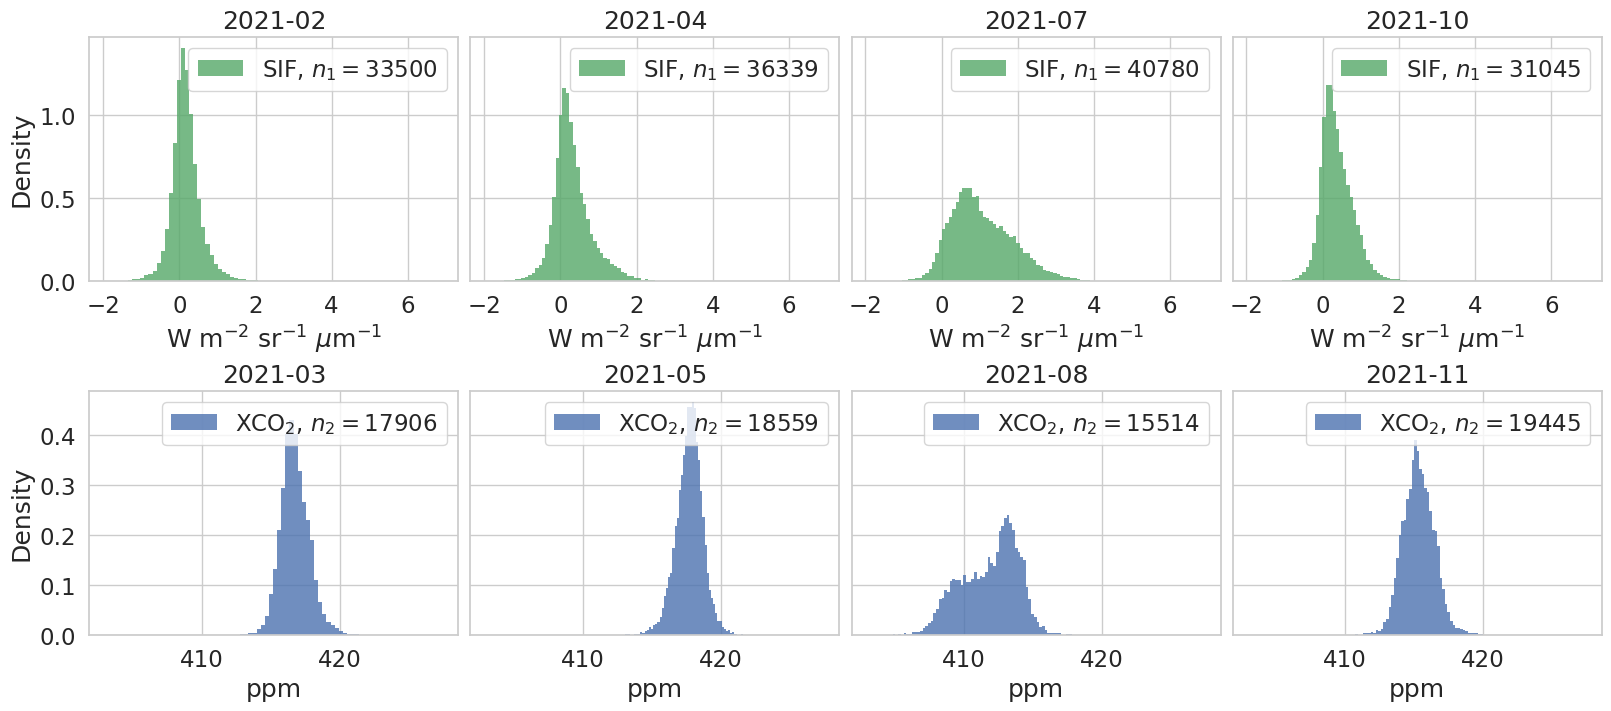

In [4]:
SIF_COLOR = "#55A868"
XCO2_COLOR = "#4C72B0"
ALPHA = 0.8
months_sif = ["2021-02", "2021-04", "2021-07", "2021-10"]
months_xco2 = ["2021-03", "2021-05", "2021-08", "2021-11"]

fig, axes = plt.subplots(
    2, 4, figsize=(16, 7), sharey="row", sharex="row", constrained_layout=True
)

for i, month in enumerate(months_sif):
    hist = sns.histplot(
        data=sif_groups.get_group(month),
        x="sif",
        stat="density",
        bins=80,
        color=SIF_COLOR,
        linewidth=0,
        alpha=ALPHA,
        label=f"SIF, $n_1 =${sif_counts[month]}",
        ax=axes[0, i],
    )
    hist.legend()
    hist.set_xlabel("W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$")
    hist.set_title(f"{month}")

for i, month in enumerate(months_xco2):
    hist = sns.histplot(
        data=xco2_groups.get_group(month),
        x="xco2",
        stat="density",
        bins=80,
        color=XCO2_COLOR,
        linewidth=0,
        alpha=ALPHA,
        label=f"XCO$_2$, $n_2 =${xco2_counts[month]}",
        ax=axes[1, i],
    )
    hist.legend()
    hist.set_xlabel("ppm")
    hist.set_title(f"{month}")


In [5]:
fig.savefig(f"../figures/histograms.pdf", dpi=300, bbox_inches="tight")
